## Observations and Insights 

In [9]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
raw_data = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="inner")

# Display the data table for preview
raw_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [10]:
# Checking the number of mice.
len(raw_data["Mouse ID"].unique())

249

In [11]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup=raw_data[raw_data.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]
print(dup)

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
908           45.000000                 0  
909           45.000000                 0  
910           48.786801                 0  
911           47.570392        

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

In [12]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean = raw_data.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep='last')
clean

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [13]:
# Checking the number of mice in the clean DataFrame.
len(clean["Mouse ID"].unique())

249

## Summary Statistics

In [17]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
group = clean.groupby(['Drug Regimen'])
group.head(10)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
692,c580,Ketapril,Male,22,25,10,47.570174,1
693,c580,Ketapril,Male,22,25,15,51.991708,1
694,c580,Ketapril,Male,22,25,20,55.575322,2
695,c580,Ketapril,Male,22,25,25,56.289062,2


In [18]:
regimen=clean['Drug Regimen'].nunique()
regimen


10

In [19]:
#mean,median,variance,std, and SEM
mean = clean.groupby(['Drug Regimen']).mean()['Tumor Volume (mm3)']
print(f"Mean of the tumor volume for each drug regimen: {mean}")

median = clean.groupby(['Drug Regimen']).median()['Tumor Volume (mm3)']
print(f"Median of the tumor volume for each drug regimen: {median}")

variance = clean.groupby(['Drug Regimen']).var()['Tumor Volume (mm3)']
print(f"Variance of the tumor volume for each drug regimen: {variance}")

stdev = clean.groupby(['Drug Regimen']).std()['Tumor Volume (mm3)']
print(f"Standard Deviation of the tumor volume for each drug regimen: {stdev}")

sem = clean.groupby(['Drug Regimen']).sem()['Tumor Volume (mm3)']
print(f"SEM of the tumor volume for each drug regimen: {sem}")

Mean of the tumor volume for each drug regimen: Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.382993
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64
Median of the tumor volume for each drug regimen: Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.783528
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64
Variance of the tumor volume for each drug regimen: Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     43.220205
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float6

In [21]:
#Assemble into a summary DF
summary = pd.DataFrame({"Mean" : mean,"Median" : median,"Variance" : variance,"Standard Deviation" : stdev,"SEM" : sem})

summary

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.382993,50.783528,43.220205,6.574208,0.526358
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [22]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
clean.groupby(['Drug Regimen']).clean['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

AttributeError: 'DataFrameGroupBy' object has no attribute 'clean'

## Bar and Pie Charts

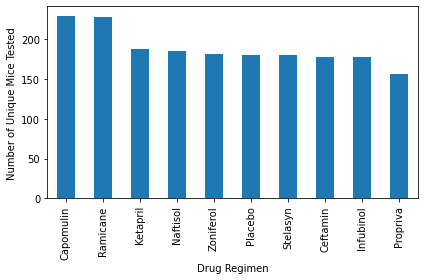

In [23]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
grouped = clean["Drug Regimen"].value_counts()


bar = grouped.plot(kind='bar')

bar.set_ylabel("Number of Unique Mice Tested")
bar.set_xlabel("Drug Regimen")
plt.tight_layout()
plot1 = plt.figure(1)
plt.show()

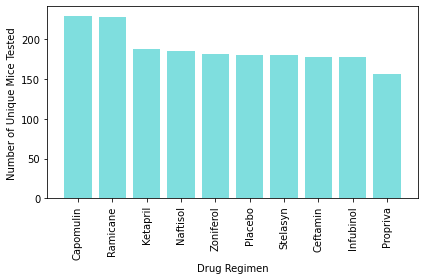

In [26]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
plt.bar(grouped.index.values, grouped.values, color='c', alpha=0.5, align='center')

plt.xticks(rotation="vertical")
plt.ylabel("Number of Unique Mice Tested")
plt.xlabel("Drug Regimen")
plt.tight_layout()
plt.show()

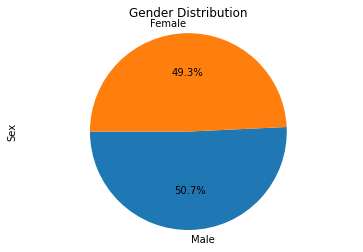

In [28]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender=clean["Sex"].value_counts()
gender

gpie=gender.plot(kind="pie", y="Sex",startangle=180,autopct='%1.1f%%', title="Gender Distribution")
gpie.set_ylabel("Sex")
plt.axis("equal")

plt.show()

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
l = gender_group.index.values 
s = gender_group 
colors=['blue', 'darkorange']
explode = (0.1, 0)
plt.pie(sizes, explode=explode, labels=l, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=180)
plt.ylabel("Sex") 
plt.title("Gender Distribution")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
